- train dataset - Herbatica, test dataset - Barefootky
<!-- - train:test = 80:20 -->
- attributes set: Non-Interaction + E-commerce Interaction 


In [1]:
import numpy as np 
import pandas as pd
import collections # counter
import matplotlib.pyplot as plt
import seaborn as sns
from copy import *
from statistics import mean

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.utils import column_or_1d
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import VarianceThreshold

In [2]:
# selection_method = 1
selection_method = 2

In [3]:
pd.options.display.max_columns = None
# cv = False 
cv = True
k = 5

# train/test set size (%)
if cv == False:
    test_size = 0.20
    k = 1

In [4]:
folder_train = 'csv_he'
folder_test = 'csv_b_500'

In [5]:
# Load data
X_train, X_test, y_train, y_test = list(), list(), list(), list()
for i in range(k):
    X_train.append(pd.read_csv(folder_train + '/train_data_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    X_test.append(pd.read_csv(folder_test + '/test_data_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    y_train.append(pd.read_csv(folder_train + '/train_label_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))
    y_test.append(pd.read_csv(folder_test + '/test_label_' + str(selection_method) + '_cv_' + str(cv) + '_' + str(i) + '.csv'))

    y_train[i] = column_or_1d(y_train[i]['repeat_buyer'], warn=True)
    y_test[i] = column_or_1d(y_test[i]['repeat_buyer'], warn=True)

In [7]:
# N + IE
attributes = ['time_1', 'time_2', 'time_3', 'day_1', 'day_2', 'load_time_buy', 'load_time_no_buy',
                'effective_duration_buy', 'effective_duration_no_buy', 'user_mean_eff_duration',
                'pv_product_mean_eff_duration_no_buy', 'pv_product_mean_eff_duration_buy', 
                'n_sessions', 'mean_price', 'device.type_desktop', 'device.type_mobile', 'device.type_tablet', 
                'browser.name_-', 'browser.name_Chrome', 'browser.name_Edge', 'browser.name_Facebook', 
                'browser.name_Firefox', 'browser.name_MIUI Browser', 'browser.name_Opera', 'browser.name_Safari', 
                'os.name_Android', 'os.name_Linux', 'os.name_Windows', 'os.name_iOS',
                'country_AT', 'country_CZ', 'country_SK', 'country_HU', 
                'city_type_0', 'city_type_1', 'city_type_2', 'city_type_3', 'continent_EU',
                'n_add_to_cart_buy', 'n_add_to_cart_no_buy', 'n_cart_buy', 'n_cart_no_buy', 
                'n_top_product_u', 'n_unique_product_u', 'n_top_category_u', 'n_unique_category_u',
                'n_product_buy', 'n_product_no_buy', 'n_non_product_buy', 'n_non_product_no_buy', 
                'n_category_buy', 'n_category_no_buy', 
                'referrer1_-', 'referrer1_azet', 'referrer1_facebook', 'referrer1_google', 
                'referrer1_instagram']

In [8]:
for i in range(k):
    X_train[i] = X_train[i][X_train[i].columns & attributes]
    X_test[i] = X_test[i][X_test[i].columns & attributes]

In [10]:
# # Load data
# X_train = pd.read_csv(folder + '/train_data_' + project_train + '.csv')
# X_test = pd.read_csv(folder + '/test_data_' + project_test + '.csv')
# y_train = pd.read_csv(folder + '/train_label_' + project_train + '.csv')
# y_test = pd.read_csv(folder + '/test_label_' + project_test + '.csv')

# y_train = column_or_1d(y_train['repeat_buyer'], warn=True)
# y_test = column_or_1d(y_test['repeat_buyer'], warn=True)

In [11]:
classifiers = [
    GradientBoostingClassifier(),
    GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, max_depth=3, min_samples_split=5, min_samples_leaf=10),
]

CV = 0



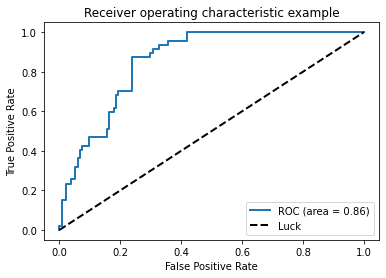

acc: 0.7071823204419889
prec: 0.46875
rec: 0.9574468085106383
Classification report - GradientBoostingClassifier:
Success ratio: 78.84%
              precision    recall  f1-score   support

       False       0.98      0.62      0.76       134
        True       0.47      0.96      0.63        47

    accuracy                           0.71       181
   macro avg       0.72      0.79      0.69       181
weighted avg       0.84      0.71      0.72       181

Confusion matrix: 
[[83 51]
 [ 2 45]]


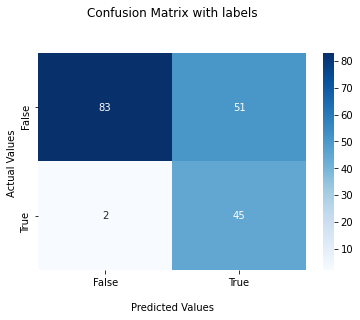

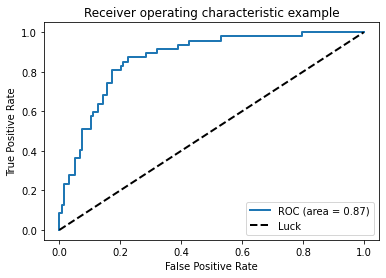

acc: 0.7734806629834254
prec: 0.5394736842105263
rec: 0.8723404255319149
Classification report - GradientBoostingClassifier:
Success ratio: 80.56%
              precision    recall  f1-score   support

       False       0.94      0.74      0.83       134
        True       0.54      0.87      0.67        47

    accuracy                           0.77       181
   macro avg       0.74      0.81      0.75       181
weighted avg       0.84      0.77      0.79       181

Confusion matrix: 
[[99 35]
 [ 6 41]]


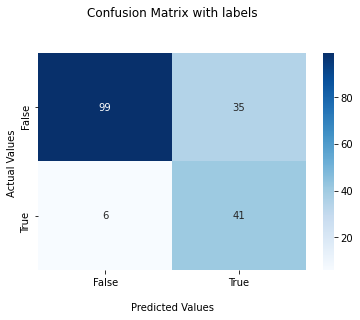

 
CV = 1



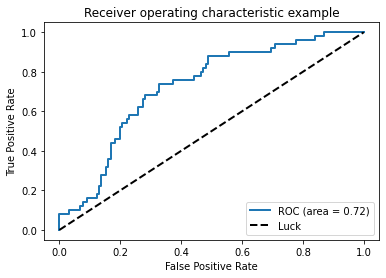

acc: 0.56353591160221
prec: 0.37606837606837606
rec: 0.88
Classification report - GradientBoostingClassifier:
Success ratio: 66.14%
              precision    recall  f1-score   support

       False       0.91      0.44      0.59       131
        True       0.38      0.88      0.53        50

    accuracy                           0.56       181
   macro avg       0.64      0.66      0.56       181
weighted avg       0.76      0.56      0.58       181

Confusion matrix: 
[[58 73]
 [ 6 44]]


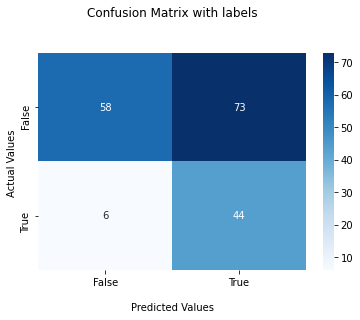

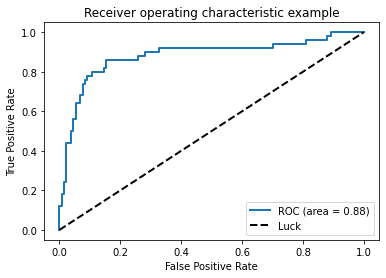

acc: 0.6740331491712708
prec: 0.45544554455445546
rec: 0.92
Classification report - GradientBoostingClassifier:
Success ratio: 75.01%
              precision    recall  f1-score   support

       False       0.95      0.58      0.72       131
        True       0.46      0.92      0.61        50

    accuracy                           0.67       181
   macro avg       0.70      0.75      0.66       181
weighted avg       0.81      0.67      0.69       181

Confusion matrix: 
[[76 55]
 [ 4 46]]


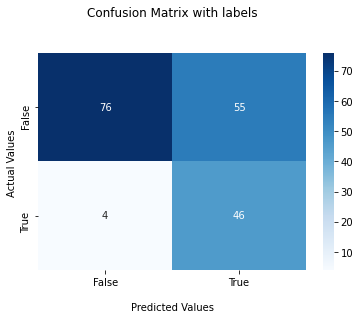

 
CV = 2



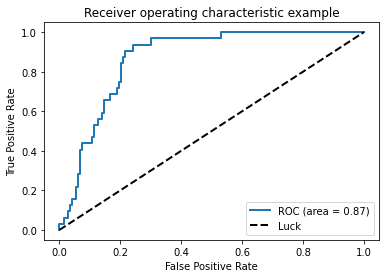

acc: 0.7955801104972375
prec: 0.45098039215686275
rec: 0.71875
Classification report - GradientBoostingClassifier:
Success ratio: 76.54%
              precision    recall  f1-score   support

       False       0.93      0.81      0.87       149
        True       0.45      0.72      0.55        32

    accuracy                           0.80       181
   macro avg       0.69      0.77      0.71       181
weighted avg       0.85      0.80      0.81       181

Confusion matrix: 
[[121  28]
 [  9  23]]


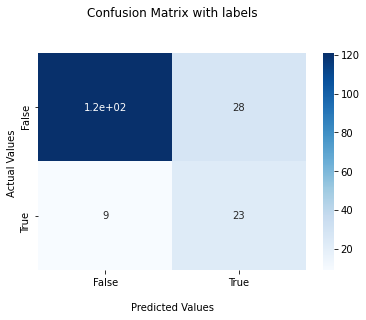

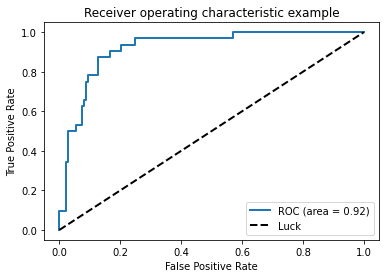

acc: 0.7569060773480663
prec: 0.4189189189189189
rec: 0.96875
Classification report - GradientBoostingClassifier:
Success ratio: 84.01%
              precision    recall  f1-score   support

       False       0.99      0.71      0.83       149
        True       0.42      0.97      0.58        32

    accuracy                           0.76       181
   macro avg       0.70      0.84      0.71       181
weighted avg       0.89      0.76      0.79       181

Confusion matrix: 
[[106  43]
 [  1  31]]


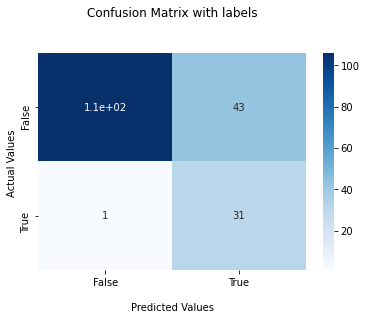

 
CV = 3



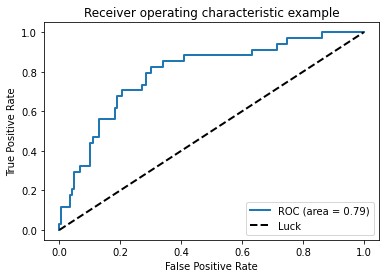

acc: 0.6906077348066298
prec: 0.358974358974359
rec: 0.8235294117647058
Classification report - GradientBoostingClassifier:
Success ratio: 74.17%
              precision    recall  f1-score   support

       False       0.94      0.66      0.78       147
        True       0.36      0.82      0.50        34

    accuracy                           0.69       181
   macro avg       0.65      0.74      0.64       181
weighted avg       0.83      0.69      0.72       181

Confusion matrix: 
[[97 50]
 [ 6 28]]


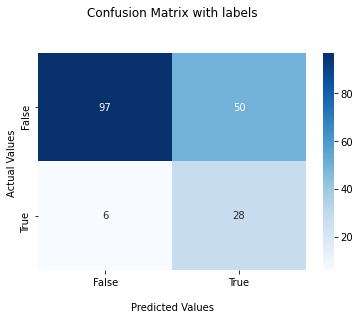

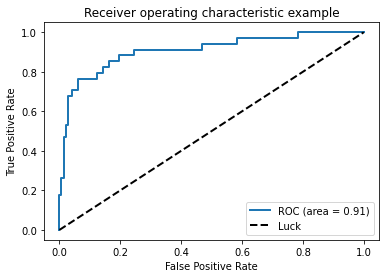

acc: 0.7292817679558011
prec: 0.4025974025974026
rec: 0.9117647058823529
Classification report - GradientBoostingClassifier:
Success ratio: 79.94%
              precision    recall  f1-score   support

       False       0.97      0.69      0.80       147
        True       0.40      0.91      0.56        34

    accuracy                           0.73       181
   macro avg       0.69      0.80      0.68       181
weighted avg       0.86      0.73      0.76       181

Confusion matrix: 
[[101  46]
 [  3  31]]


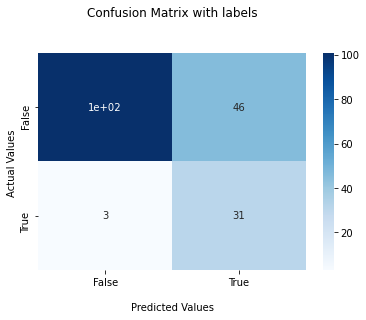

 
CV = 4



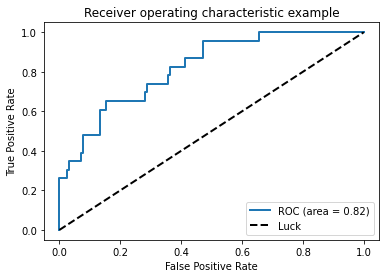

acc: 0.6222222222222222
prec: 0.2289156626506024
rec: 0.8260869565217391
Classification report - GradientBoostingClassifier:
Success ratio: 70.92%
              precision    recall  f1-score   support

       False       0.96      0.59      0.73       157
        True       0.23      0.83      0.36        23

    accuracy                           0.62       180
   macro avg       0.59      0.71      0.55       180
weighted avg       0.87      0.62      0.68       180

Confusion matrix: 
[[93 64]
 [ 4 19]]


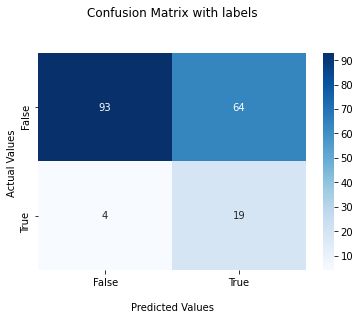

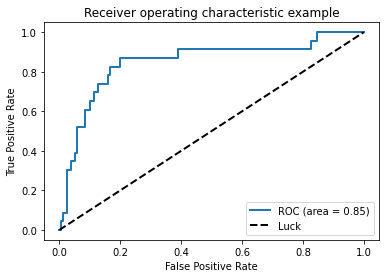

acc: 0.7
prec: 0.28169014084507044
rec: 0.8695652173913043
Classification report - GradientBoostingClassifier:
Success ratio: 77.24%
              precision    recall  f1-score   support

       False       0.97      0.68      0.80       157
        True       0.28      0.87      0.43        23

    accuracy                           0.70       180
   macro avg       0.63      0.77      0.61       180
weighted avg       0.88      0.70      0.75       180

Confusion matrix: 
[[106  51]
 [  3  20]]


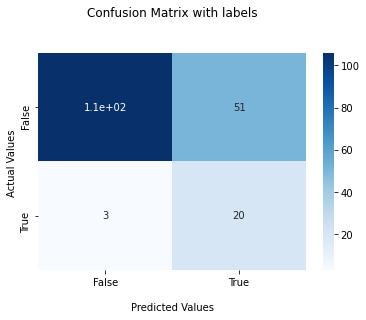

In [12]:
# Build a forest and compute the feature importances
text_export = []
success_ratio = {}
acc_results = {}
prec_results = {}
rec_results = {}
roc_results = {}


for clf in classifiers:
    success_ratio[clf] = list()
    acc_results[clf] = list()
    prec_results[clf] = list()
    rec_results[clf] = list()
    roc_results[clf] = list()

for i in range(k):
    print("CV = " + str(i) + "\n")
    
    for clf in classifiers:
        classifier_name = str(clf.__class__.__name__)                
        probabilities = clf.fit(X_train[i], y_train[i]).predict_proba(X_test[i])     
        predicted = clf.predict(X_test[i])
        
        fpr, tpr, _ = roc_curve(y_test[i], probabilities[:, 1]) 
        roc_auc = auc(fpr, tpr)
        
        # plot ROC
        plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', 
                 label='Luck')                

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
                        
        report = classification_report(y_true = y_test[i], y_pred = predicted)                
        precision, recall, fscore, support = score(y_true = y_test[i], y_pred = predicted)
        
        acc = accuracy_score(y_true = y_test[i], y_pred = predicted)
        prec = precision_score(y_true = y_test[i], y_pred = predicted)
        rec = recall_score(y_true = y_test[i], y_pred = predicted)
        
        print("acc:", acc)
        print("prec:", prec)
        print("rec:", rec)

        a = recall[0]
        b = recall[1]
        c = support[0]
        d = support[1]

        success_ratio[clf].append((a + b) / 2 * 100) # (recall false + recall true) / 2
        acc_results[clf].append(acc)
        prec_results[clf].append(prec)
        rec_results[clf].append(rec)
        roc_results[clf].append(roc_auc)

        print('Classification report - ' + classifier_name + ':')
        print('Success ratio: %.2f%%' % success_ratio[clf][i])
        print(report)
        print('Confusion matrix: ')
        cf_matrix = confusion_matrix(y_test[i], predicted)
        print(cf_matrix)

        ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues')
        ax.set_title('Confusion Matrix with labels\n\n')
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ')
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        # Display the visualization of the Confusion Matrix.
        plt.show()
        print(' ')


In [13]:
for clf in classifiers:
    print(str(clf))
    print(str(round(mean(success_ratio[clf]),2)) + " %")
    print(str(round(mean(acc_results[clf]),2)))
    print(str(round(mean(prec_results[clf]),2)))
    print(str(round(mean(rec_results[clf]),2)))
    print(str(round(mean(roc_results[clf]),2)))
    print()

GradientBoostingClassifier()
73.32 %
0.68
0.38
0.84
0.81

GradientBoostingClassifier(learning_rate=0.5, min_samples_leaf=10,
                           min_samples_split=5, n_estimators=200)
79.35 %
0.73
0.42
0.91
0.88

